# Importy

In [200]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU, Conv1D, MaxPooling1D, Flatten, SimpleRNN
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# Import danych

In [201]:
df = pd.read_csv('dane.csv', header=0)

# Jak wyglądają dane

In [202]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [203]:
df.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202
4857376,1617148800,58767.75,58778.18,58755.97,58778.18,2.712831,159417.751000,58764.349363


# Oznaczenia
- Open -> Cena pierwszej transakcji w danym okresie czasu
- High -> Najwyższa cena w danym okresie czasu
- Low -> Najniższa cena w danym okresie czasu
- Close -> Cena ostatniej transakcji w danym okresie czasu 
- Volume_(BTC) -> łączna ilość wymienionych bitcoinów w danym okresie czasu
- Volume_(Currency) -> łączna kwota wszystkich transakcji w danym okresie czasu.
- Weighted_Price -> średnia cena bitcoina w danym okresie czasu

# Przekształcenie 'Timestamp' z int na date

In [204]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
df['Timestamp'] = df['Timestamp'].dt.floor('min')
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


# Ustawienie Timestamp jako index

In [205]:
df.set_index('Timestamp', inplace=True)
df

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496


# Przekształcenie danych co minutę na dane co godzinę

In [206]:
df = df.resample('1H').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume_(BTC)': 'sum',
    'Volume_(Currency)': 'sum',
    'Weighted_Price': 'mean'   
})
df

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 07:00:00,4.39,4.39,4.39,4.39,0.455581,2.000000e+00,4.390000
2011-12-31 08:00:00,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
2011-12-31 09:00:00,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
2011-12-31 10:00:00,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
2011-12-31 11:00:00,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
...,...,...,...,...,...,...,...
2021-03-30 20:00:00,59118.91,59135.00,58402.82,58669.04,118.576288,6.960580e+06,58682.385127
2021-03-30 21:00:00,58644.04,58872.27,58570.57,58759.04,57.605048,3.380143e+06,58705.094588
2021-03-30 22:00:00,58758.44,58941.34,58642.58,58711.15,68.019168,3.999820e+06,58788.454429


# Podstawowe info o danych

In [207]:
df.shape

(81066, 7)

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 81066 entries, 2011-12-31 07:00:00 to 2021-03-31 00:00:00
Freq: H
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Open               77534 non-null  float64
 1   High               77534 non-null  float64
 2   Low                77534 non-null  float64
 3   Close              77534 non-null  float64
 4   Volume_(BTC)       81066 non-null  float64
 5   Volume_(Currency)  81066 non-null  float64
 6   Weighted_Price     77534 non-null  float64
dtypes: float64(7)
memory usage: 4.9 MB


In [209]:
df.describe()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,77534.000000,77534.000000,77534.000000,77534.000000,81066.000000,8.106600e+04,77534.000000
mean,4794.253073,4824.253301,4761.551381,4794.980842,415.612822,1.861709e+06,4794.586897
std,8278.126181,8339.353980,8212.560526,8280.355857,660.723602,4.814568e+06,8279.529492
min,3.800000,4.140000,1.500000,4.140000,0.000000,0.000000e+00,4.140000
25%,286.852500,288.275000,285.000000,287.000000,93.031939,4.253985e+04,286.867022
50%,788.640000,791.870000,783.630000,788.635000,224.466581,2.782766e+05,788.595951
75%,7422.015000,7462.000000,7382.505000,7424.997500,483.732387,1.642141e+06,7425.971393
max,61601.930000,61781.830000,61095.030000,61601.930000,20551.251040,2.475085e+08,61363.600604


# Ile wieszy nie zawiera danych

In [210]:
df.isnull().sum()

Open                 3532
High                 3532
Low                  3532
Close                3532
Volume_(BTC)            0
Volume_(Currency)       0
Weighted_Price       3532
dtype: int64

# Czy jeśli wiersz nie zawiera jakiś danych to nie zawiera danych od Open do Weighted_Price

In [211]:
df.isnull().sum(axis=1).unique()

array([0, 5], dtype=int64)

Zatem odpowiedź na to pytanie jest pozytywna

# Czy w 'Timestamp' nie ma przesku większego niż godzina

In [212]:
df.index.to_series().diff().unique()

array([        'NaT', 3600000000000], dtype='timedelta64[ns]')

# Ile procent danych stanowią wiersze z brakującymi danymi

In [213]:
df.isnull().sum() / df.shape[0] * 100

Open                 4.356944
High                 4.356944
Low                  4.356944
Close                4.356944
Volume_(BTC)         0.000000
Volume_(Currency)    0.000000
Weighted_Price       4.356944
dtype: float64

# Macierz korelacji

In [214]:
df.corr().style.background_gradient(cmap='coolwarm')

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Open,1.000000,0.999963,0.999945,0.999930,-0.024214,0.598244,0.999975
High,0.999963,1.000000,0.999920,0.999964,-0.022757,0.601224,0.999981
Low,0.999945,0.999920,1.000000,0.999953,-0.026500,0.593372,0.999973
Close,0.999930,0.999964,0.999953,1.000000,-0.024444,0.598066,0.999976
Volume_(BTC),-0.024214,-0.022757,-0.026500,-0.024444,1.000000,0.328529,-0.024475
Volume_(Currency),0.598244,0.601224,0.593372,0.598066,0.328529,1.000000,0.597766
Weighted_Price,0.999975,0.999981,0.999973,0.999976,-0.024475,0.597766,1.000000


# Przedstwienie cen bitcoina w czasie

<Axes: xlabel='Timestamp'>

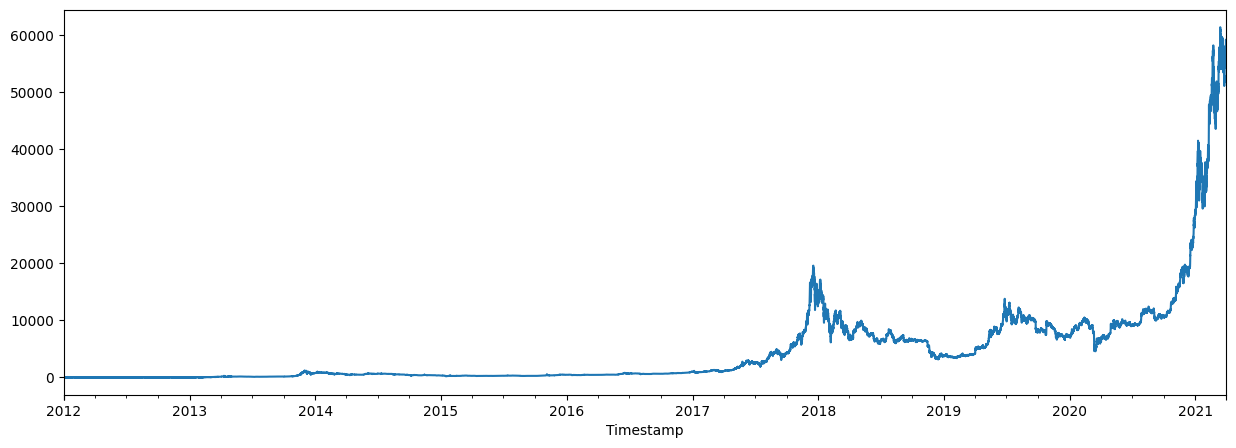

In [215]:
df['Weighted_Price'].plot(figsize=(15, 5))

# Uzupełnianie missing data
Skoro dane są sekwencyjne najlepiej je będzie uzupełnić wcześniejszą wartością

In [216]:
df.fillna(method='ffill', inplace=True)
df

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 07:00:00,4.39,4.39,4.39,4.39,0.455581,2.000000e+00,4.390000
2011-12-31 08:00:00,4.39,4.39,4.39,4.39,0.000000,0.000000e+00,4.390000
2011-12-31 09:00:00,4.39,4.39,4.39,4.39,0.000000,0.000000e+00,4.390000
2011-12-31 10:00:00,4.39,4.39,4.39,4.39,0.000000,0.000000e+00,4.390000
2011-12-31 11:00:00,4.39,4.39,4.39,4.39,0.000000,0.000000e+00,4.390000
...,...,...,...,...,...,...,...
2021-03-30 20:00:00,59118.91,59135.00,58402.82,58669.04,118.576288,6.960580e+06,58682.385127
2021-03-30 21:00:00,58644.04,58872.27,58570.57,58759.04,57.605048,3.380143e+06,58705.094588
2021-03-30 22:00:00,58758.44,58941.34,58642.58,58711.15,68.019168,3.999820e+06,58788.454429


# Dodanie kolumny Future_Weighted_Price
Dodajemy ją gdyż chcemy przewidzieć średnią wartość bitcoina dnia następnego a na ten czas nie posiadamy takiej kolumny. Po czymś takim możemy zbadać korelacje w sposób dokładniejszy.

In [217]:
n = 24 # 24 hours
df['Future_Weighted_Price'] = df['Weighted_Price'].shift(-n)
df.iloc[::n, :]

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Future_Weighted_Price
Timestamp,,,,,,,,
2011-12-31 07:00:00,4.39,4.39,4.39,4.39,0.455581,2.000000e+00,4.390000,4.580000
2012-01-01 07:00:00,4.58,4.58,4.58,4.58,0.000000,0.000000e+00,4.580000,5.000000
2012-01-02 07:00:00,5.00,5.00,5.00,5.00,0.000000,0.000000e+00,5.000000,5.000000
2012-01-03 07:00:00,5.00,5.00,5.00,5.00,0.000000,0.000000e+00,5.000000,4.930000
2012-01-04 07:00:00,4.93,4.93,4.93,4.93,0.000000,0.000000e+00,4.930000,5.777027
...,...,...,...,...,...,...,...,...
2021-03-26 07:00:00,52600.90,53698.99,52418.94,53650.42,543.675532,2.885299e+07,52879.653391,54960.199202
2021-03-27 07:00:00,55015.12,55129.29,54756.39,54982.82,60.429168,3.320426e+06,54960.199202,56084.451395
2021-03-28 07:00:00,55927.05,56277.89,55872.28,56212.33,43.480715,2.440264e+06,56084.451395,55882.718336


# Usunięcie ostatnich n wierszy z powodu braku danych do 'Future_Weighted_Price'

In [218]:
df = df.iloc[:-n, :]
df

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Future_Weighted_Price
Timestamp,,,,,,,,
2011-12-31 07:00:00,4.39,4.39,4.39,4.39,0.455581,2.000000e+00,4.390000,4.580000
2011-12-31 08:00:00,4.39,4.39,4.39,4.39,0.000000,0.000000e+00,4.390000,4.580000
2011-12-31 09:00:00,4.39,4.39,4.39,4.39,0.000000,0.000000e+00,4.390000,4.580000
2011-12-31 10:00:00,4.39,4.39,4.39,4.39,0.000000,0.000000e+00,4.390000,4.580000
2011-12-31 11:00:00,4.39,4.39,4.39,4.39,0.000000,0.000000e+00,4.390000,4.580000
...,...,...,...,...,...,...,...,...
2021-03-29 20:00:00,57665.67,57728.76,57091.37,57248.20,290.874268,1.669743e+07,57420.161270,58682.385127
2021-03-29 21:00:00,57227.51,57622.98,57171.89,57555.94,167.605375,9.616739e+06,57389.899424,58705.094588
2021-03-29 22:00:00,57545.45,57904.40,57447.13,57728.96,153.997010,8.888151e+06,57711.070913,58788.454429


# Macierz korelacji gdy posiadamy dodatkową kolumnę

In [219]:
df.corr().style.background_gradient(cmap='coolwarm')

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Future_Weighted_Price
Open,1.000000,0.999963,0.999945,0.999930,-0.007013,0.603431,0.999975,0.998452
High,0.999963,1.000000,0.999920,0.999964,-0.005591,0.606375,0.999981,0.998491
Low,0.999945,0.999920,1.000000,0.999953,-0.009255,0.598605,0.999973,0.998474
Close,0.999930,0.999964,0.999953,1.000000,-0.007242,0.603254,0.999976,0.998515
Volume_(BTC),-0.007013,-0.005591,-0.009255,-0.007242,1.000000,0.328792,-0.007273,-0.006665
Volume_(Currency),0.603431,0.606375,0.598605,0.603254,0.328792,1.000000,0.602952,0.602855
Weighted_Price,0.999975,0.999981,0.999973,0.999976,-0.007273,0.602952,1.000000,0.998495
Future_Weighted_Price,0.998452,0.998491,0.998474,0.998515,-0.006665,0.602855,0.998495,1.000000


# Usunięcie niepotrzenych kolumn
Usuwam Open, High, Low, Close mimo wysokiej korelacji z tego względu, że kolumna weighted_price jest na nich liczona

In [220]:
df = df[['Weighted_Price', 'Volume_(Currency)', 'Future_Weighted_Price']]
df

,Weighted_Price,Volume_(Currency),Future_Weighted_Price
Timestamp,,,
2011-12-31 07:00:00,4.390000,2.000000e+00,4.580000
2011-12-31 08:00:00,4.390000,0.000000e+00,4.580000
2011-12-31 09:00:00,4.390000,0.000000e+00,4.580000
2011-12-31 10:00:00,4.390000,0.000000e+00,4.580000
2011-12-31 11:00:00,4.390000,0.000000e+00,4.580000
...,...,...,...
2021-03-29 20:00:00,57420.161270,1.669743e+07,58682.385127
2021-03-29 21:00:00,57389.899424,9.616739e+06,58705.094588
2021-03-29 22:00:00,57711.070913,8.888151e+06,58788.454429


# Stworzenie "okien" o rozmiarze m
Nie wyczytałem tego bezpośrednio z danych ale udało mi się znaleźć taką informacje na internecie, że ludzie przewidują na podstawie danych z większej ilości dni. Oznacza to, że jeśli chcę zwiekszyć dokładność to muszę mieć większy zakres informacji o cenach

In [221]:
m = 24 # 24 hours
X = []
y = []
for i in range(m, df.shape[0]):
    X.append(df.iloc[i-m:i, 0:2].values)
    y.append(df.iloc[i, 2])
X, y = np.array(X), np.array(y)

In [226]:
X.shape, y.shape

((81018, 24, 2), (81018,))

# Dzielenie na zbiór treningowy i testowy

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60763, 24, 2), (20255, 24, 2), (60763,), (20255,))

# Skalowanie danych

In [228]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, 2)).reshape(-1, m, 2)
X_test = scaler.transform(X_test.reshape(-1, 2)).reshape(-1, m, 2)
X_train.shape, X_test.shape

((60763, 24, 2), (20255, 24, 2))

# Szukanie optymalnych parametrów dla LSTM

In [196]:
class ProgressCallbackLSTM(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print("Epoch:", epoch + 1, "- Loss:", logs["loss"])

# Funkcja tworząca model
def create_model_LSTM(units=50, dropout=0.2):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=True, input_shape=(X_train.shape[1], 2)))
    model.add(Dropout(dropout))
    model.add(LSTM(units=units, return_sequences=True))
    model.add(Dropout(dropout))
    model.add(LSTM(units=units))
    model.add(Dropout(dropout))
    model.add(Dense(units=1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Utworzenie obiektu KerasRegressor
model = KerasRegressor(build_fn=create_model_LSTM)

# Definicja siatki parametrów do przeszukania
param_grid = {
    'units': [50, 100],
    'dropout': [0.2, 0.3]
}

# Utworzenie obiektu GridSearchCV
grid_search_LSTM = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Wykonanie przeszukiwania siatki
grid_search_LSTM.fit(X_train, y_train, epochs=10, batch_size=32, callbacks=[ProgressCallbackLSTM()])

# Wyświetlenie najlepszych parametrów
grid_search_LSTM.best_params_

C:\Users\KG Studia\AppData\Local\Temp\ipykernel_2008\1115240463.py:19: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model_LSTM)


Epoch 1/10
1266/1266 [==============================] - 61s 43ms/step - loss: 88268368.0000
Epoch 2/10
1266/1266 [==============================] - 54s 43ms/step - loss: 87716168.0000
Epoch 3/10
1266/1266 [==============================] - 54s 42ms/step - loss: 87178424.0000
Epoch 4/10
1266/1266 [==============================] - 54s 43ms/step - loss: 86654560.0000
Epoch 5/10
1266/1266 [==============================] - 55s 43ms/step - loss: 86129744.0000
Epoch 6/10
1266/1266 [==============================] - 53s 42ms/step - loss: 85622296.0000
Epoch 7/10
1266/1266 [==============================] - 54s 43ms/step - loss: 85119536.0000
Epoch 8/10
1266/1266 [==============================] - 54s 43ms/step - loss: 84617304.0000
Epoch 9/10
1266/1266 [==============================] - 54s 42ms/step - loss: 84133080.0000
Epoch 10/10
633/633 [==============================] - 8s 11ms/step - loss: 85506264.0000
Epoch 1/10
1266/1266 [==============================] - 55s 41ms/step - loss: 9057

{'dropout': 0.2, 'units': 100}

# Szukanie optymalnych parametrów dla GRU

In [197]:
#Create grind search for GRU
class ProgressCallbackGRU(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print("Epoch:", epoch + 1, "- Loss:", logs["loss"])

# Funkcja tworząca model
def create_model_GRU(units=50, dropout=0.2):
    model = Sequential()
    model.add(GRU(units=units, return_sequences=True, input_shape=(X_train.shape[1], 2)))
    model.add(Dropout(dropout))
    model.add(GRU(units=units, return_sequences=True))
    model.add(Dropout(dropout))
    model.add(GRU(units=units))
    model.add(Dropout(dropout))
    model.add(Dense(units=1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Utworzenie obiektu KerasRegressor
model = KerasRegressor(build_fn=create_model_GRU)

# Definicja siatki parametrów do przeszukania
param_grid = {
    'units': [50, 100],
    'dropout': [0.2, 0.3]
}

# Utworzenie obiektu GridSearchCV
grid_search_GRU = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Wykonanie przeszukiwania siatki
grid_search_GRU.fit(X_train, y_train, epochs=10, batch_size=32, callbacks=[ProgressCallbackGRU()])
# Wyświetlenie najlepszych parametrów
grid_search_GRU.best_params_

C:\Users\KG Studia\AppData\Local\Temp\ipykernel_2008\3712704718.py:20: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model_GRU)


Epoch 1/10
1266/1266 [==============================] - 48s 35ms/step - loss: 88269328.0000
Epoch 2/10
1266/1266 [==============================] - 45s 35ms/step - loss: 87716000.0000
Epoch 3/10
1266/1266 [==============================] - 44s 35ms/step - loss: 87180520.0000
Epoch 4/10
1266/1266 [==============================] - 44s 35ms/step - loss: 86652096.0000
Epoch 5/10
1266/1266 [==============================] - 44s 35ms/step - loss: 86128552.0000
Epoch 6/10
1266/1266 [==============================] - 44s 35ms/step - loss: 85611608.0000
Epoch 7/10
1266/1266 [==============================] - 44s 35ms/step - loss: 85110904.0000
Epoch 8/10
1266/1266 [==============================] - 44s 35ms/step - loss: 84620976.0000
Epoch 9/10
1266/1266 [==============================] - 44s 35ms/step - loss: 84133784.0000
Epoch 10/10
633/633 [==============================] - 6s 9ms/step - loss: 85509848.0000
Epoch 1/10
1266/1266 [==============================] - 61s 44ms/step - loss: 90566

{'dropout': 0.2, 'units': 100}

# Optymalne hiperparametu modelu CNN

In [198]:
class ProgressCallbackCNN(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print("Epoch:", epoch + 1, "- Loss:", logs["loss"])

def create_model_CNN(filters, dropout_rate, units):
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 2)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(dropout_rate))
    model.add(Conv1D(filters=filters, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(dropout_rate))
    model.add(Flatten())
    model.add(Dense(units=units, activation='relu'))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

model = KerasRegressor(build_fn=create_model_CNN, verbose=0)

param_grid = {
    'filters': [64, 128, 256],
    'dropout_rate': [0.2, 0.3, 0.4],
    'units': [50, 100, 200]
}

grid_search_CNN = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

progress_callback = ProgressCallbackCNN()
grid_search_CNN.fit(X_train, y_train, epochs=10, batch_size=32, callbacks=[progress_callback])

grid_search_CNN.best_params_

C:\Users\KG Studia\AppData\Local\Temp\ipykernel_2008\3785563267.py:19: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model_CNN, verbose=0)


Epoch: 1 - Loss: 15034892.0
Epoch: 2 - Loss: 514683.3125
Epoch: 3 - Loss: 496566.28125
Epoch: 4 - Loss: 467961.21875
Epoch: 5 - Loss: 469711.90625
Epoch: 6 - Loss: 487504.375
Epoch: 7 - Loss: 477232.625
Epoch: 8 - Loss: 491743.40625
Epoch: 9 - Loss: 481493.1875
Epoch: 10 - Loss: 465951.09375
Epoch: 1 - Loss: 12748593.0
Epoch: 2 - Loss: 487952.3125
Epoch: 3 - Loss: 482044.125
Epoch: 4 - Loss: 464893.125
Epoch: 5 - Loss: 491956.09375
Epoch: 6 - Loss: 472284.71875
Epoch: 7 - Loss: 479735.34375
Epoch: 8 - Loss: 462947.8125
Epoch: 9 - Loss: 483314.3125
Epoch: 10 - Loss: 488893.03125
Epoch: 1 - Loss: 13242795.0
Epoch: 2 - Loss: 477262.21875
Epoch: 3 - Loss: 467819.84375
Epoch: 4 - Loss: 445211.5
Epoch: 5 - Loss: 447706.375
Epoch: 6 - Loss: 445578.65625
Epoch: 7 - Loss: 474171.6875
Epoch: 8 - Loss: 438717.0625
Epoch: 9 - Loss: 461611.125
Epoch: 10 - Loss: 453711.6875
Epoch: 1 - Loss: 12356285.0
Epoch: 2 - Loss: 520245.78125
Epoch: 3 - Loss: 484358.0625
Epoch: 4 - Loss: 460367.625
Epoch: 5 - L

{'dropout_rate': 0.2, 'filters': 256, 'units': 200}

# Szukanie optymalnych parametrów RNN

In [199]:
#Create grind search for RNN
class ProgressCallbackRNN(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print("Epoch:", epoch + 1, "- Loss:", logs["loss"])

# Funkcja tworząca model
def create_model_RNN(units=50, dropout=0.2):
    model = Sequential()
    model.add(SimpleRNN(units=units, return_sequences=True, input_shape=(X_train.shape[1], 2)))
    model.add(Dropout(dropout))
    model.add(SimpleRNN(units=units, return_sequences=True))
    model.add(Dropout(dropout))
    model.add(SimpleRNN(units=units))
    model.add(Dropout(dropout))
    model.add(Dense(units=1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Utworzenie obiektu KerasRegressor
model = KerasRegressor(build_fn=create_model_RNN)

# Definicja siatki parametrów do przeszukania
param_grid = {
    'units': [50, 100],
    'dropout': [0.2, 0.3]
}

# Utworzenie obiektu GridSearchCV
grid_search_RNN = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Wykonanie przeszukiwania siatki
grid_search_RNN.fit(X_train, y_train, epochs=10, batch_size=32, callbacks=[ProgressCallbackRNN()])
# Wyświetlenie najlepszych parametrów
grid_search_RNN.best_params_

C:\Users\KG Studia\AppData\Local\Temp\ipykernel_2008\2474266408.py:20: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model_RNN)


Epoch 1/10
1266/1266 [==============================] - 16s 11ms/step - loss: 88284176.0000
Epoch 2/10
1266/1266 [==============================] - 13s 10ms/step - loss: 87731184.0000
Epoch 3/10
1266/1266 [==============================] - 13s 10ms/step - loss: 87195560.0000
Epoch 4/10
1266/1266 [==============================] - 13s 10ms/step - loss: 86665376.0000
Epoch 5/10
1266/1266 [==============================] - 13s 10ms/step - loss: 86144712.0000
Epoch 6/10
1266/1266 [==============================] - 13s 11ms/step - loss: 85632904.0000
Epoch 7/10
1266/1266 [==============================] - 13s 10ms/step - loss: 85125208.0000
Epoch 8/10
1266/1266 [==============================] - 13s 10ms/step - loss: 84628624.0000
Epoch 9/10
1266/1266 [==============================] - 13s 11ms/step - loss: 84146744.0000
Epoch 10/10
633/633 [==============================] - 3s 4ms/step - loss: 85517272.0000
Epoch 1/10
1266/1266 [==============================] - 15s 10ms/step - loss: 90570

{'dropout': 0.2, 'units': 100}

# Model LSTM

In [230]:
#Implement model LSTM with grid_search_LSTM
model_LSTM = Sequential()
model_LSTM.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 2)))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(LSTM(units=100, return_sequences=True))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(LSTM(units=100))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(Dense(units=1))
model_LSTM.compile(optimizer='adam', loss='mean_squared_error')
model_LSTM.fit(X_train, y_train, epochs=25, batch_size=32, callbacks=[ProgressCallbackLSTM()])


Epoch 1/25
1899/1899 [==============================] - 316s 163ms/step - loss: 88462608.0000
Epoch 2/25
1899/1899 [==============================] - 297s 156ms/step - loss: 86957504.0000
Epoch 3/25
1899/1899 [==============================] - 297s 157ms/step - loss: 85510944.0000
Epoch 4/25
1899/1899 [==============================] - 296s 156ms/step - loss: 84135576.0000
Epoch 5/25
1899/1899 [==============================] - 295s 155ms/step - loss: 82799616.0000
Epoch 6/25
1899/1899 [==============================] - 305s 161ms/step - loss: 81522912.0000
Epoch 7/25
1899/1899 [==============================] - 307s 162ms/step - loss: 80330760.0000
Epoch 8/25
1899/1899 [==============================] - 305s 161ms/step - loss: 79200664.0000
Epoch 9/25
1899/1899 [==============================] - 307s 162ms/step - loss: 78105304.0000
Epoch 10/25
1899/1899 [==============================] - 307s 162ms/step - loss: 77102888.0000
Epoch 11/25
1899/1899 [==============================] - 30

# Model GRU

In [231]:
#Implement model GRU with grid_search_GRU
model_GRU = Sequential()
model_GRU.add(GRU(units=100, return_sequences=True, input_shape=(X_train.shape[1], 2)))
model_GRU.add(Dropout(0.2))
model_GRU.add(GRU(units=100, return_sequences=True))
model_GRU.add(Dropout(0.2))
model_GRU.add(GRU(units=100))
model_GRU.add(Dropout(0.2))
model_GRU.add(Dense(units=1))
model_GRU.compile(optimizer='adam', loss='mean_squared_error')
model_GRU.fit(X_train, y_train, epochs=25, batch_size=32, callbacks=[ProgressCallbackGRU()])

Epoch 1/25
1899/1899 [==============================] - 245s 125ms/step - loss: 88426328.0000
Epoch 2/25
1899/1899 [==============================] - 238s 125ms/step - loss: 86850392.0000
Epoch 3/25
1899/1899 [==============================] - 240s 126ms/step - loss: 85356464.0000
Epoch 4/25
1899/1899 [==============================] - 238s 126ms/step - loss: 83926912.0000
Epoch 5/25
1899/1899 [==============================] - 241s 127ms/step - loss: 82572792.0000
Epoch 6/25
1899/1899 [==============================] - 241s 127ms/step - loss: 81299072.0000
Epoch 7/25
1899/1899 [==============================] - 237s 125ms/step - loss: 80087528.0000
Epoch 8/25
1899/1899 [==============================] - 236s 124ms/step - loss: 78937688.0000
Epoch 9/25
1899/1899 [==============================] - 237s 125ms/step - loss: 77870424.0000
Epoch 10/25
1899/1899 [==============================] - 243s 128ms/step - loss: 76852632.0000
Epoch 11/25
1899/1899 [==============================] - 23

# Model CNN na optymalnych paramatrach

In [232]:
#Implement model CNN with grid_search_CNN
model_CNN = Sequential()
model_CNN.add(Conv1D(filters=256, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 2)))
model_CNN.add(MaxPooling1D(pool_size=2))
model_CNN.add(Dropout(0.2))
model_CNN.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model_CNN.add(MaxPooling1D(pool_size=2))
model_CNN.add(Dropout(0.2))
model_CNN.add(Flatten())
model_CNN.add(Dense(units=200, activation='relu'))
model_CNN.add(Dense(units=1))
model_CNN.compile(optimizer='adam', loss='mean_squared_error')
model_CNN.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[ProgressCallbackCNN()])

Epoch 1/100
1899/1899 [==============================] - 38s 19ms/step - loss: 4254640.0000
Epoch 2/100
1899/1899 [==============================] - 35s 19ms/step - loss: 385155.0312
Epoch 3/100
1899/1899 [==============================] - 39s 20ms/step - loss: 392038.0000
Epoch 4/100
1899/1899 [==============================] - 34s 18ms/step - loss: 387700.8750
Epoch 5/100
1899/1899 [==============================] - 35s 18ms/step - loss: 378488.1562
Epoch 6/100
1899/1899 [==============================] - 35s 18ms/step - loss: 381847.4062
Epoch 7/100
1899/1899 [==============================] - 35s 18ms/step - loss: 390118.5625
Epoch 8/100
1899/1899 [==============================] - 34s 18ms/step - loss: 401589.5625
Epoch 9/100
1899/1899 [==============================] - 34s 18ms/step - loss: 379902.1250
Epoch 10/100
1899/1899 [==============================] - 34s 18ms/step - loss: 384653.5938
Epoch 11/100
1899/1899 [==============================] - 36s 19ms/step - loss: 386634.3

# Model RNN

In [233]:
#Implement model RNN with grid_search_RNN
model_RNN = Sequential()
model_RNN.add(SimpleRNN(units=100, return_sequences=True, input_shape=(X_train.shape[1], 2)))
model_RNN.add(Dropout(0.2))
model_RNN.add(SimpleRNN(units=100, return_sequences=True))
model_RNN.add(Dropout(0.2))
model_RNN.add(SimpleRNN(units=100))
model_RNN.add(Dropout(0.2))
model_RNN.add(Dense(units=1))
model_RNN.compile(loss='mean_squared_error', optimizer='adam')
model_RNN.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[ProgressCallbackRNN()])

Epoch 1/100
1899/1899 [==============================] - 72s 36ms/step - loss: 88430104.0000
Epoch 2/100
1899/1899 [==============================] - 68s 36ms/step - loss: 86849112.0000
Epoch 3/100
1899/1899 [==============================] - 68s 36ms/step - loss: 85357120.0000
Epoch 4/100
1899/1899 [==============================] - 71s 37ms/step - loss: 83937720.0000
Epoch 5/100
1899/1899 [==============================] - 66s 35ms/step - loss: 82583000.0000
Epoch 6/100
1899/1899 [==============================] - 67s 35ms/step - loss: 81296360.0000
Epoch 7/100
1899/1899 [==============================] - 66s 35ms/step - loss: 80084464.0000
Epoch 8/100
1899/1899 [==============================] - 67s 35ms/step - loss: 78949952.0000
Epoch 9/100
1899/1899 [==============================] - 64s 34ms/step - loss: 77882544.0000
Epoch 10/100
1899/1899 [==============================] - 65s 34ms/step - loss: 76856448.0000
Epoch 11/100
1899/1899 [==============================] - 64s 34ms/st

# Predykcja danych testowych

In [234]:
#Predict test set
y_pred_lstm = model_lstm.predict(X_test)
y_pred_gru = model_gru.predict(X_test)
y_pred_cnn = model_cnn.predict(X_test)
y_pred_rnn = model_rnn.predict(X_test)


633/633 [==============================] - 3s 4ms/step


# Porównanie modeli

In [235]:
#model comparison
from sklearn.metrics import mean_squared_error

mse_lstm = mean_squared_error(y_test, y_pred_lstm)
mse_gru = mean_squared_error(y_test, y_pred_gru)
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
mse_rnn = mean_squared_error(y_test, y_pred_rnn)

print('MSE LSTM: ', mse_lstm)
print('MSE GRU: ', mse_gru)
print('MSE CNN: ', mse_cnn)
print('MSE RNN: ', mse_rnn)

MSE LSTM:  62176338.31722735
MSE GRU:  39825765.11419946
MSE CNN:  498970.69064550276
MSE RNN:  62176232.629265316


633/633 [==============================] - 3s 4ms/step


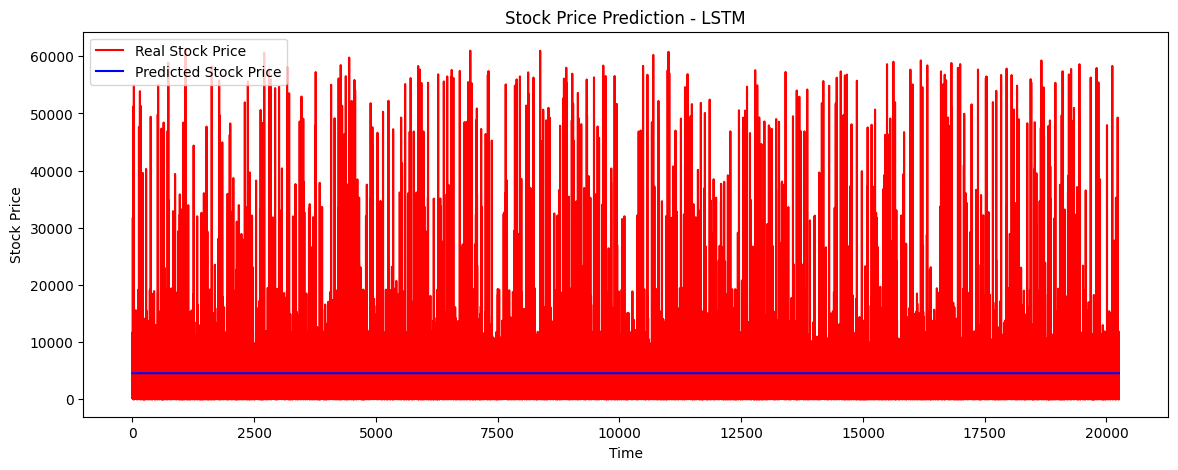

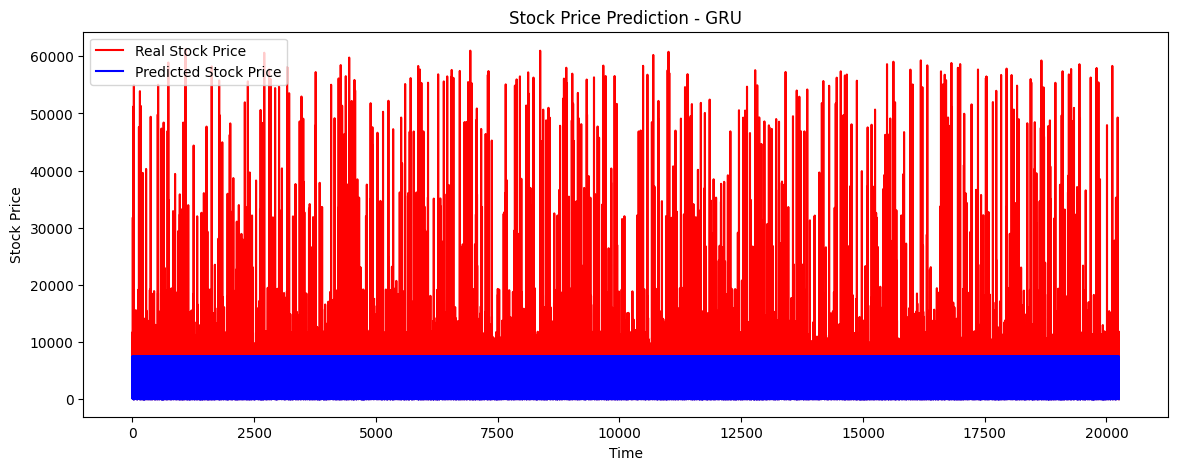

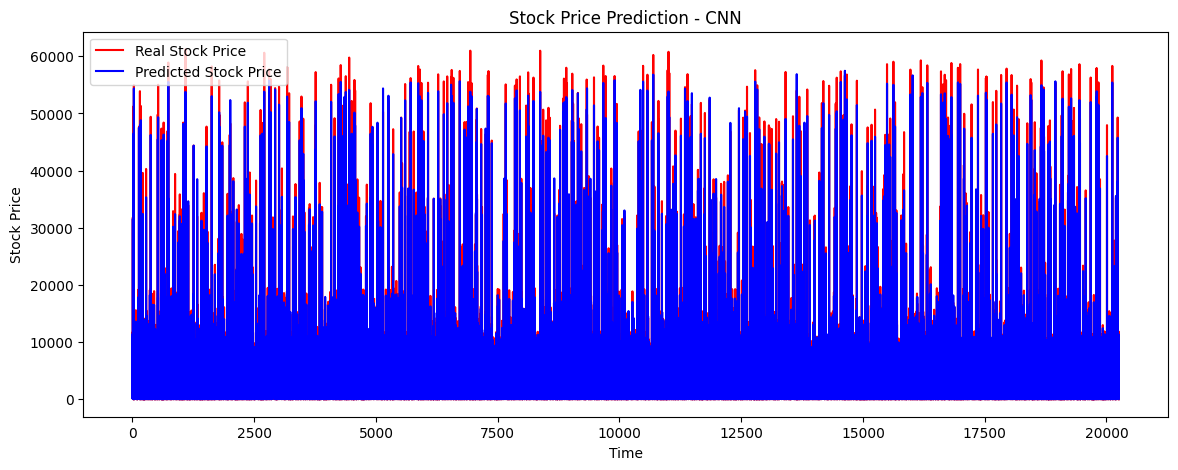

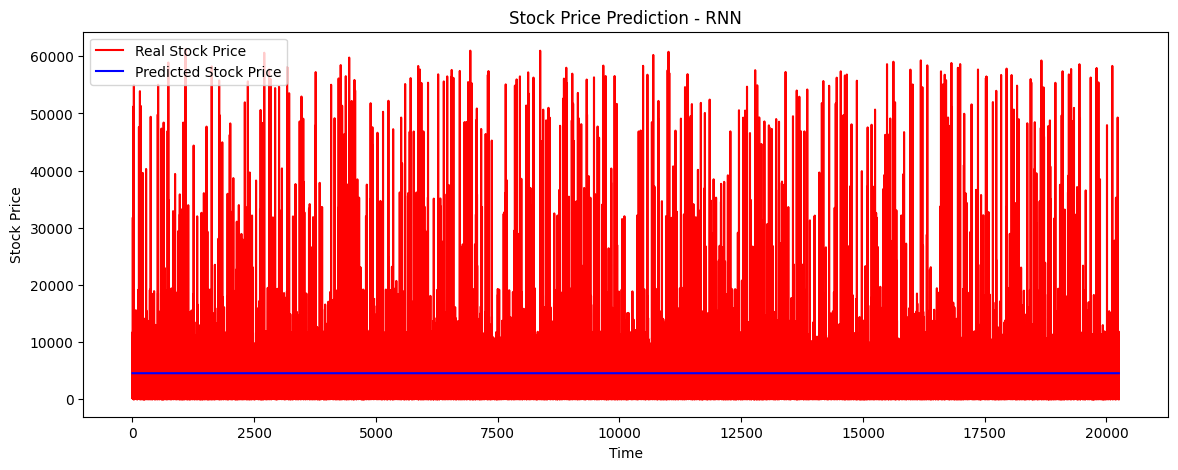

In [236]:
#test models
from matplotlib import pyplot as plt


y_pred_lstm = model_lstm.predict(X_test)
y_pred_gru = model_gru.predict(X_test)
y_pred_cnn = model_cnn.predict(X_test)
y_pred_rnn = model_rnn.predict(X_test)

#Plot results as linear plot in separate windows
plt.figure(figsize=(14,5))
plt.plot(y_test, color='red', label='Real Stock Price')
plt.plot(y_pred_lstm, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction - LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

plt.figure(figsize=(14,5))
plt.plot(y_test, color='red', label='Real Stock Price')
plt.plot(y_pred_gru, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction - GRU')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

plt.figure(figsize=(14,5))
plt.plot(y_test, color='red', label='Real Stock Price')
plt.plot(y_pred_cnn, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction - CNN')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

plt.figure(figsize=(14,5))
plt.plot(y_test, color='red', label='Real Stock Price')
plt.plot(y_pred_rnn, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction - RNN')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


# Zapis modeli

In [237]:
#save models
model_lstm.save('model_lstm.h5')
model_gru.save('model_gru.h5')
model_cnn.save('model_cnn.h5')
model_rnn.save('model_rnn.h5')